In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [84]:
cov=pd.read_csv('/content/covid-19 symptoms dataset.csv')

In [85]:
cov.head()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
0,102,0,9,0,-1,0
1,102,0,10,0,0,1
2,104,0,33,1,-1,0
3,101,1,59,0,1,0
4,99,0,98,0,0,0


In [86]:
cov.isnull().sum()

,0
fever,0
bodyPain,0
age,0
runnyNose,0
diffBreath,0
infectionProb,0


In [87]:
cov.shape

(2575, 6)

In [88]:
x=cov.iloc[:,[3,5]].values

In [89]:
print(x)

[[0 0]
 [0 1]
 [1 0]
 ...
 [1 0]
 [0 1]
 [1 1]]


In [90]:
WCSS = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)

  WCSS.append(kmeans.inertia_)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:

In [91]:
kmean=KMeans(n_clusters=5,init='k-means++',random_state=0)

In [92]:
covid=kmean.fit_predict(x)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [93]:
covid

array([2, 0, 1, ..., 1, 0, 3], dtype=int32)

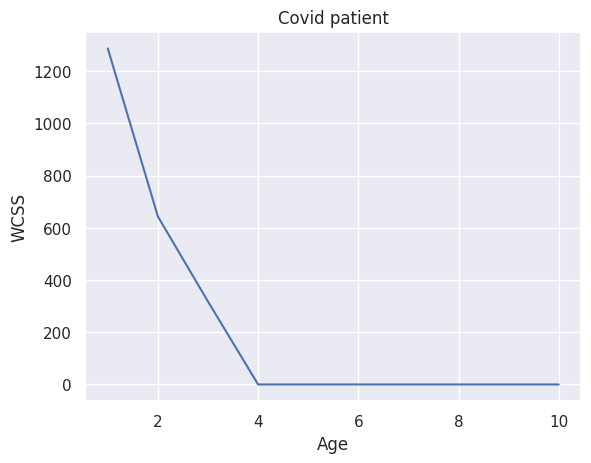

In [94]:
sns.set()
plt.plot(range(1,11),WCSS)
plt.title('Covid patient')
plt.xlabel('Age')
plt.ylabel('WCSS')
plt.show()

In [95]:
kmean=KMeans(n_clusters=5,init='k-means++',random_state=0)
y=kmean.fit_predict(x)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [96]:
cov['cluster']=y

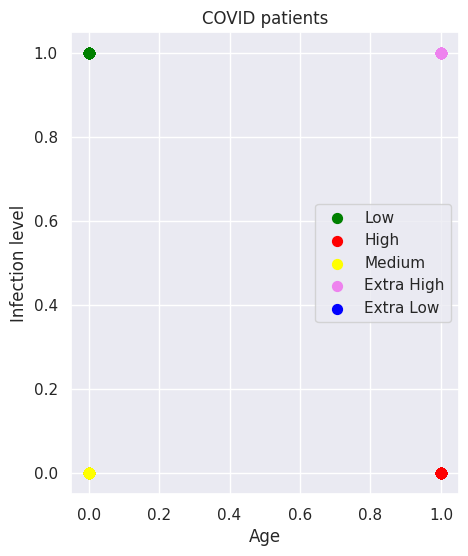

In [102]:
plt.figure(figsize=(5,6))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='Low')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='red',label='High')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='yellow',label='Medium')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='violet',label='Extra High')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='blue',label='Extra Low')
plt.title('COVID patients')
plt.xlabel('Age')
plt.ylabel('Breadth level')
plt.legend()
plt.show()


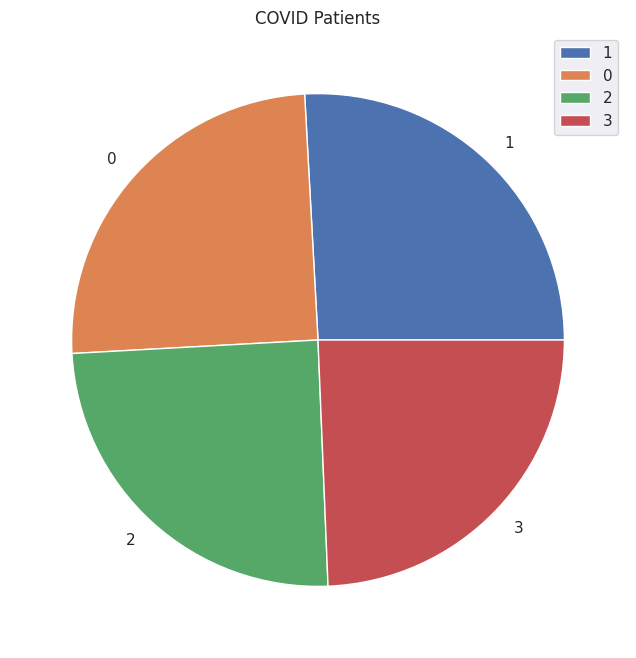

In [108]:
c=pd.Series(covid).value_counts()
plt.figure(figsize=(8,8))
plt.pie(c,labels=c.index)
plt.legend()
plt.title('COVID Patients')
plt.show()
